
# CRIM Intervals:  Melodic and Harmonic

### Basic Goals

- Examine Macro-level aspects of your Mass+Model corpus (with similarity Matrices and Cadence Maps)
- Examine Micro-level aspects of your Mass+Model corpus (exploring particular ngrams, presentation types, and cadences made evident at the macro-level)
- Draw some conclusions about the overall points of similarity and difference among some subset of your pieces

### Tasks in Detail  

### 1. Exploring Entry Melodies
- 1.1 **Load the piece(s)** from your corpus

#### Shared Entries (Macro Level)

- 1.2 use the **piece.modelFinder** method to build a table summarizing the percentage of "entries" shared among the pieces.  These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
- 1.3 The **heatmap of the modelFinder** results will show the relatedness clearly for your corpus.
- 1.4 Which **mass movements** are most similar to the model?  To each other?

#### Shared Modules (Macro Level)

- 1.5 Now use **piece.moduleFinder** to build a table summarizing the percentage of "contrapuntal modules" shared in your corpus. These modules are also the ones that occur around the entries found in the previous step.
- 1.6 Use the **heatmap of the moduleFinder** results to compare the relatedness in your corpus.
- 1.7 How do these two calculations compare across the corpus at a macro level?  Which pieces seem to use similar melodies in the same ways?  In different ways?

#### Shared Entries (Micro Level)
- 1.8 Which **specific entry melodies** are shared by the to most similar pieces?  The list will give you an idea of which melodies are involved.
- 1.9 Make a **HeatMap of the ngrams** in your pieces, and find your shared ngrams on them.
- 1.10 Based on the visual blocks of the HeatMap (and the offsets that show when you hover on them):
    - Where in your piece do these entries appear--at the outset, middle, near the end? 
    - Are they in roughly the same place in the two related movements/pieces?
    - What Presentation Types do these shared entries seem to be involved in?  PEN?  ID?  Fuga? 
- 1.11 Now return to the **Presentation Type** method (**piece.presentationTypes**) and see what the CRIM intervals says about your pair of pieces and the partcular ngrams/entries you are focusing on.
    - What types did it find?  Do you agree?  
    - If you search for Hidden Types, does it find still others?
    - Given that the composer of the Mass is definitely using soggetti from the Model, did they do the _same_ thing with that material as found in the model?  Or something different?  Do you they think they were being creative, or just going through the motions?
    - If you listen to the piece, do any of the machine patterns make sense to you?
        
    
### 2.  Overall Conclusions

- How are your chosen pieces most related?  Most different?  Write a few sentences and provide some highlights from your analysis


#### Read Documentation for Each Method
- Read the documentation with this command `print(ImportedPiece.YourMethod.__doc__)`, where you will replace `'YourMethod'` with the name of the individual method, for example `print(ImportedPiece.melodic.__doc__)`


*** 

### A. Import Intervals and Other Code


In [1]:
import intervals
from intervals import * 
from intervals import main_objs
from os import listdir
import os.path
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from IPython.display import display
import requests
import os
import glob
import plotly.graph_objects as go
from os import listdir
import os.path

# keep these functions

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

def _offset_joiner(a):
        b = ', '.join(map(str, a))
        return b

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)
else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece


### Import Model and Mass as a Combined Corpus

In [4]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0019"  # <==  put your model number here!
mass_id = "0019" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list

['https://crimproject.org/mei/CRIM_Model_0019.mei',
 'https://crimproject.org/mei/CRIM_Mass_0019_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0019_2.mei',
 'https://crimproject.org/mei/CRIM_Mass_0019_3.mei',
 'https://crimproject.org/mei/CRIM_Mass_0019_4.mei',
 'https://crimproject.org/mei/CRIM_Mass_0019_5.mei']

In [5]:
corpus = CorpusBase(corpus_list)

# Shared Entries (Macro Level)



### 1.1 Melodic Entries as Similarity Matrix

* Use the **modelFinder** method to build a table summarizing the **percentage of "entries" shared among the pieces.** 
* These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
thematic (i.e. recurring) melodies can be found as thematic melodies in all the other pieces in your corpus**. The
specific number of times they appear in the model is not considered, provided that it is
at least two.


### How to Read the Results:

* As you read across, you will see the percentage of melodies in the row value that come from the corresponding column value.  

### Provide Your Commentary as indicated


In [6]:
corpus = CorpusBase(corpus_list)
similarity_matrix = corpus.modelFinder()
similarity_matrix

Model,CRIM_Model_0019,CRIM_Mass_0019_1,CRIM_Mass_0019_2,CRIM_Mass_0019_3,CRIM_Mass_0019_4,CRIM_Mass_0019_5
Mass,,,,,,
CRIM_Model_0019,1.000000,0.750000,0.644737,0.894737,0.684211,0.644737
CRIM_Mass_0019_1,0.335616,1.000000,0.452055,0.719178,0.301370,0.219178
CRIM_Mass_0019_2,0.510949,0.569343,1.000000,0.627737,0.510949,0.394161
CRIM_Mass_0019_3,0.268734,0.325581,0.196382,1.000000,0.509044,0.372093
CRIM_Mass_0019_4,0.299145,0.273504,0.273504,0.833333,1.000000,0.594017
CRIM_Mass_0019_5,0.369369,0.279279,0.279279,0.684685,0.810811,1.000000


###  1.2 The Melodic Matrix as Heatmap

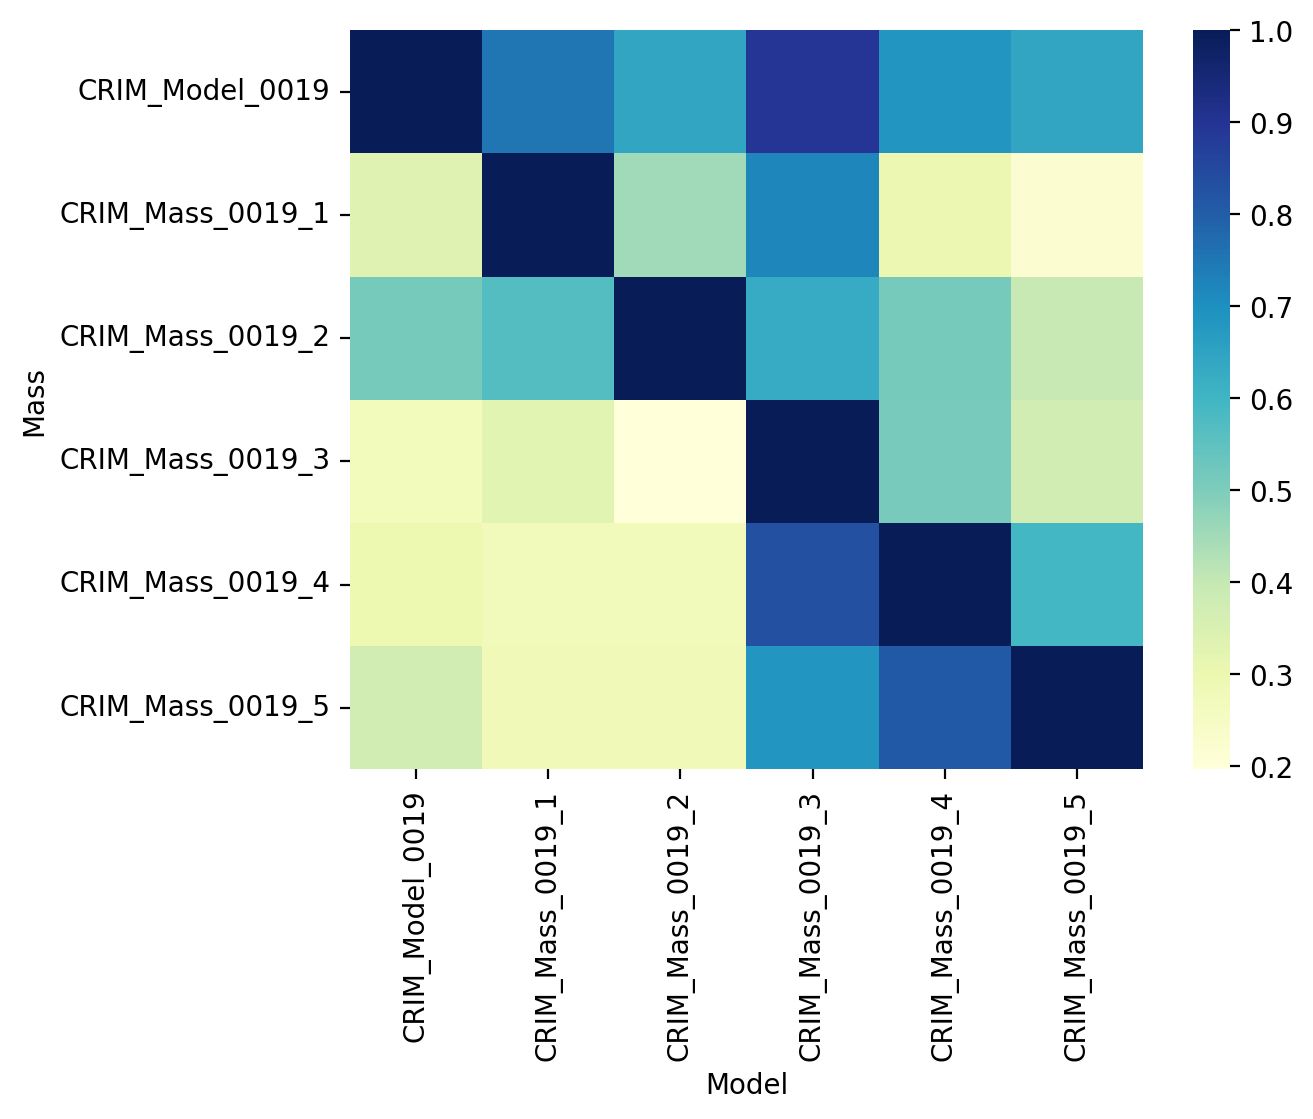

In [26]:
# melodic matrix
dataplot = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=False)
plt.show()


### A Simpler View:  Comparing the Model to the Mass

In [7]:
model_list = ['https://crimproject.org/mei/CRIM_Model_0019.mei']
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0019_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0019_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0019_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0019_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0019_5.mei']

In [8]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot

Model,CRIM_Model_0019
Mass,
CRIM_Mass_0019_1,0.335616
CRIM_Mass_0019_2,0.510949
CRIM_Mass_0019_3,0.268734
CRIM_Mass_0019_4,0.299145
CRIM_Mass_0019_5,0.369369


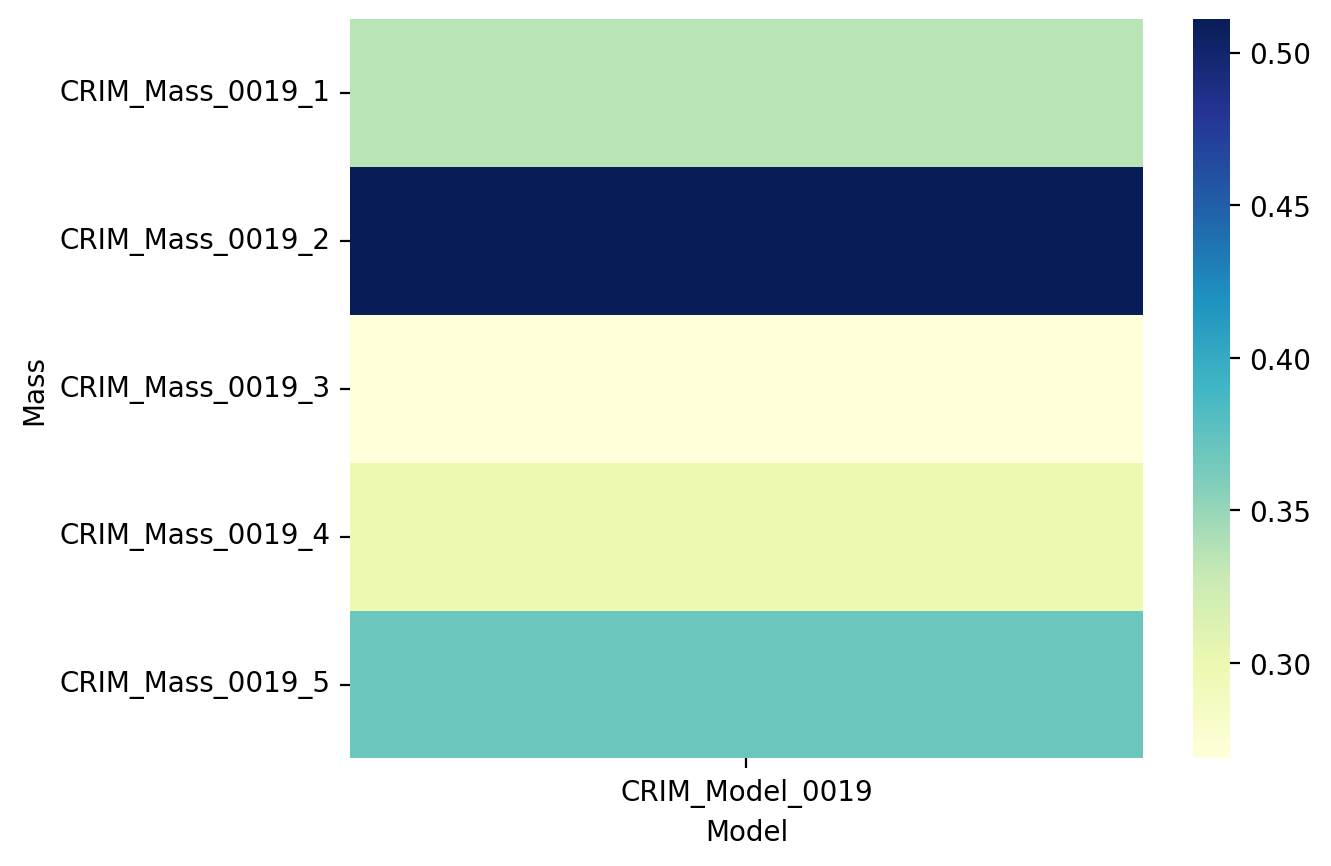

In [9]:
dataplot = sns.heatmap(cross_plot, cmap="YlGnBu", annot=False)
plt.show()

## ==> 1.4 Put your commentary on the shared entries matrix below

* Which pieces in your set seem to be most closely related in terms of melodic entries?  Which ones are not?  Which movements of the Mass seem to share the most entries with each other?

# Shared Modules (Macro Level)

### 1.5 Contrapuntal (Modular) Ngrams as Similarity Matrix

* **Contrapuntal Modules** are 'ngrams' that represent the motion of a pair of voices.  The tool finds the patterns between every pair of voices, then filters these to correspond to the moments of the 'entries'.  So it tells us not only that there are shared melodies, but what is happening to the melodies in their contrapuntal context. Learn about contrapuntal modules [here](https://github.com/HCDigitalScholarship/intervals/blob/main/tutorial/08_Contrapuntal_Modules.md).
* `moduleFinder`  method identifies all of the `modular ngrams` in each piece that **coincide with the melodic entries**.  These are the modules found in _all_ voices around the moment of the given melodic entry, so they will
include both the entries and other soggetti, too.

* Lists of unique modular ngrams are then compared across the corpus, resulting in a matrix of values.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
modular ngrams (the ones that occur at the moment of the entries) can be found in each of the other pieces in the corpus.**

#### How to Read the Results:
    - As you read across, you will see the percentage of modular ngrams in the row value that come from the corresponding column value.  

In [30]:
corpus = CorpusBase(corpus_list)
module_matrix = corpus.moduleFinder()
module_matrix

Model,CRIM_Model_0019,CRIM_Mass_0019_1,CRIM_Mass_0019_2,CRIM_Mass_0019_3,CRIM_Mass_0019_4,CRIM_Mass_0019_5
Mass,,,,,,
CRIM_Model_0019,1.000000,0.365517,0.337931,0.282759,0.331034,0.310345
CRIM_Mass_0019_1,0.287879,1.000000,0.219697,0.166667,0.196970,0.212121
CRIM_Mass_0019_2,0.280952,0.242857,1.000000,0.252381,0.290476,0.266667
CRIM_Mass_0019_3,0.222222,0.212121,0.235690,1.000000,0.228956,0.232323
CRIM_Mass_0019_4,0.282258,0.245968,0.282258,0.270161,1.000000,0.266129
CRIM_Mass_0019_5,0.401487,0.394052,0.397770,0.390335,0.401487,1.000000


### 1.6 Module Matrix as Heatmap

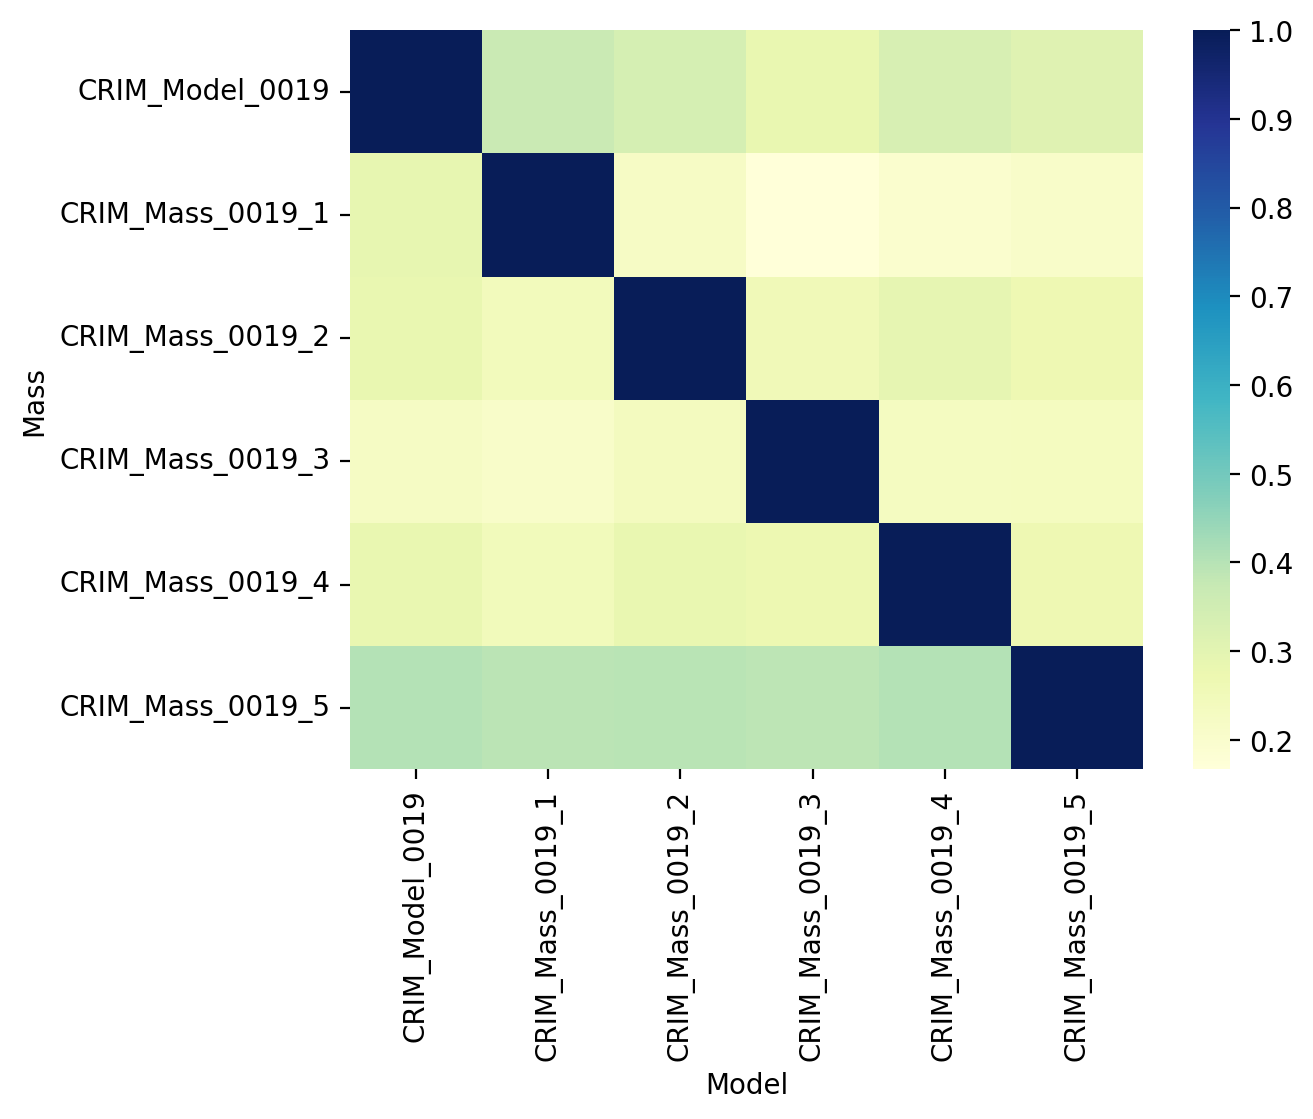

In [31]:
# module matrix

dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

In [32]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
cross_plot

Model,CRIM_Model_0019
Mass,
CRIM_Mass_0019_1,0.287879
CRIM_Mass_0019_2,0.280952
CRIM_Mass_0019_3,0.222222
CRIM_Mass_0019_4,0.282258
CRIM_Mass_0019_5,0.401487


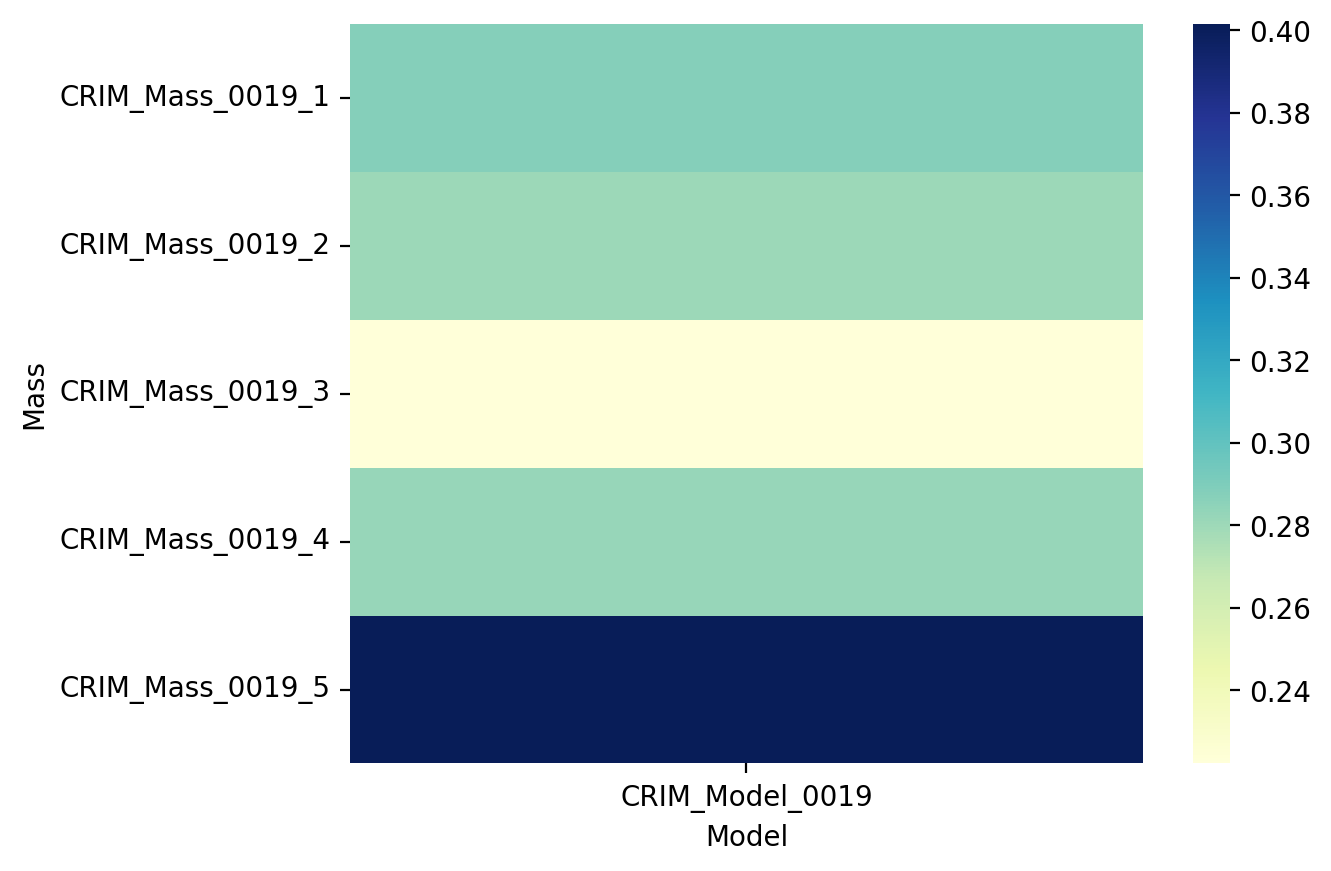

In [33]:
dataplot = sns.heatmap(cross_plot, cmap="YlGnBu", annot=False)
plt.show()

## ==>  Put your commentary on the shared modules matrix below

* Which pieces in your set seem to be most closely related in terms of modular entries?  Which ones are not?  Which movements of the Mass seem to share the most modular with each other?


# Shared Entries (Micro Level)

#### Here we explore _where_ and _how_ the shared melodies are presented in each piece

* Load a specific pair of closely related pieces from your corpus
* Find exactly which melodic entries are shared
* Find out *where* these melodies occur in each piece
* Check the Fuga, PEN, and ID Presentation Types to see how the melodies are treated in each piece.  Pick one or two melodies (and Presentation Types) as examples to describe.


In [25]:
# Specify the Model
model = corpus_list[0] # <== the model will be score "0"
model = importScore(model)

# Specify the Mass Movement(s)
mass_movement = corpus_list[4] # <== select the index number of your mass from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
print(model.metadata, mass_movement.metadata)

{'title': 'Veni sponsa Christi', 'composer': 'Giovanni Pierluigi da Palestrina', 'date': 1570} {'title': 'Missa Veni sponsa Christi: Sanctus', 'composer': 'Giovanni Pierluigi da Palestrina', 'date': 1599}


### Get the Entries and Detailed Index for A Pair of Pieces

In [26]:
# for the model
model_entries = model.entries(thematic=True, anywhere=True, n=4)
# model_entries = model_entries.applymap(convertTuple)
model_entries_det = model.detailIndex(model_entries, offset=True, progress=True)

# for the mass movement
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
# mass_movement_entries = mass_movement_entries.applymap(convertTuple)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=True, progress=True)

# check the detailed view as needed for each
# model_entries_det
# mass_movement_entries_det

### 1.8 Find the nGrams shared by your pieces

In [27]:

model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[1:]
shared_entries


[('-2', '2', '2', '2'),
 ('-3', '3', '-2', '-2'),
 ('-2', '2', '3', '-2'),
 ('-3', '2', '2', '-2'),
 ('-3', '3', '2', '-2')]

### 1.9 Make a Heatmap of Shared Entries in Two Pieces

* Let's look at **where** the shared melodies appear in each of your pieces.

* Judging only from the visualization, where do the shared melodies appear, and how similar does the treatment of them seem to be?

#### Note that you can also decide to compare one MASS movement with another MASS movement!


### Model Heatmap

In [28]:
## Use this for the Model Heatmap

nr = model.notes(combineUnisons=True) 
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = model.ngrams(df=mel, n=4)
entry_ngrams = model.entries(df=mel, n=4)
mel_ngrams_duration = model.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])


alt.Chart(...)

### Mass Movement Heatmap

In [29]:
## Use this for the Mass Movement Heatmap

nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])

alt.Chart(...)

## ==> 1.10 Your Commentary about the Heatmaps

* Based on what you can see, **what do the composers seem to be doing with the shared melodies**?  
* Do the composers use **certain melodies in the same approximate position**?  
* Do they move through these melodies in the **same order or sequence** over the course of the piece?  
* What **Presenation Types (Fuga, PEN, ID) seems to be involved**?  
* Do any melodies seem particular worth comparing in terms of their treatment in the two pieces?  

#### Make the Short Lists of These Shared Ngrams and Their Offsets

In [79]:
# for the model
model_short_list = model_entries_det[model_entries_det.isin(shared_entries)].dropna(how='all').stack()
model_offsets_of_shared_entries = model_short_list.index.get_level_values(2)
model_offsets_of_shared_entries = model_offsets_of_shared_entries.unique()

# for the mass movement
mass_movement_short_list = mass_movement_entries_det[mass_movement_entries_det.isin(shared_entries)].dropna(how='all').stack()
mass_movement_offsets_of_shared_entries = mass_movement_short_list.index.get_level_values(2)
mass_movement_offsets_of_shared_entries = mass_movement_offsets_of_shared_entries.unique()


### 1.11 Get Shared Entries as Presentation Types

* Note that not all shared entries will be used as Fuga, ID, and PEN but for those that appear in a pair of pieces, it can be informative to compare **how** they are treated!



In [81]:
# here we filter the PTypes to include ONLY those found in both the model and Mass movement

# here for the model
model_p_types = model.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 0,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)

model_shared_entry_ptypes = model_p_types[model_p_types.First_Offset.isin(model_offsets_of_shared_entries)]
model_ptypes = model_shared_entry_ptypes.drop(columns=['Offsets', 'Number_Entries', 'Flexed_Entries', "Parallel_Entries", 'Parallel_Voice', 'Count_Non_Overlaps'])

# here for the Mass movement


mass_movement_p_types = mass_movement.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 0,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)


mass_movement_shared_entry_ptypes = mass_movement_p_types[mass_movement_p_types.First_Offset.isin(mass_movement_offsets_of_shared_entries)]
mass_movement_ptypes = mass_movement_shared_entry_ptypes.drop(columns=['Offsets', 'Number_Entries', 'Flexed_Entries', "Parallel_Entries", 'Parallel_Voice', 'Count_Non_Overlaps'])
combined_ptypes = pd.concat([model_ptypes, mass_movement_ptypes])
combined_ptypes



,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Progress
0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,0.0,"[1/1.0, 2/1.0, 6/1.0, 7/1.0, 11/3.0, 14/1.0, 1...","[P-5, P-4, P-5, P8, P5, P-8]","[(-3, 3, 2, -2)]","[8.0, 32.0, 8.0, 36.0, 20.0, 24.0]","[Cantus, Altus, Tenor, Bassus, Altus, Cantus, ...",FUGA,0.000000
1,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,150.0,"[19/4.0, 21/4.0, 22/4.0, 25/4.0, 27/4.0, 29/4....","[P8, P-5, P-4, P-5, P8, P8, P-11]","[(-3, 2, 2, -2)]","[16.0, 8.0, 24.0, 16.0, 16.0, 20.0, 24.0]","[Tenor, Cantus, Altus, Tenor, Bassus, Altus, C...",FUGA,0.284091
2,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,298.0,"[38/2.0, 38/4.0, 42/2.0, 44/1.0, 46/2.0, 48/4.0]","[P-5, P-5, P8, P8, P-11]","[(-3, 3, -2, -2)]","[4.0, 28.0, 14.0, 18.0, 20.0]","[Altus, Tenor, Bassus, Altus, Cantus, Bassus]",FUGA,0.564394
3,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,394.0,"[50/2.0, 51/4.0, 53/2.0, 55/2.0, 56/4.0, 59/1....","[P5, P-8, P4, P5, P-8, P8, P-4, P-5]","[(-2, 2, 3, -2)]","[12.0, 12.0, 16.0, 12.0, 18.0, 22.0, 4.0, 16.0]","[Altus, Cantus, Bassus, Tenor, Altus, Bassus, ...",FUGA,0.746212
0,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,0.0,"[1/1.0, 3/1.0, 7/3.0, 12/1.0]","[P-5, P-4, P-5]","[(-3, 3, 2, -2)]","[16.0, 36.0, 36.0]","[Cantus, Altus, Tenor, Bassus]",FUGA,0.000000
3,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,122.0,"[16/2.0, 18/4.0, 22/4.0, 24/4.0]","[P8, P-4, P-5]","[(-3, 2, 2, -2)]","[20.0, 32.0, 16.0]","[Bassus, Altus, Tenor, Bassus]",FUGA,0.117308
4,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,126.0,"[16/4.0, 19/2.0, 20/4.0]","[P8, P-8]","[(-2, 2, 2, 2)]","[20.0, 12.0]","[Tenor, Cantus, Bassus]",FUGA,0.121154
5,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,224.0,"[28/1.0, 29/1.0, 32/3.0]","[P-5, P8]","[(-3, 3, -2, -2)]","[8.0, 28.0]","[Tenor, Bassus, Altus]",FUGA,0.215385
6,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,302.0,"[37/4.0, 38/4.0, 39/4.0, 41/4.0, 45/2.0, 46/2....","[P-8, P5, P4, P-5, P1, P-8, P12, P-8, P4, P5]","[(-2, 2, 3, -2)]","[8.0, 8.0, 16.0, 28.0, 8.0, 8.0, 28.0, 8.0, 12...","[Altus, Bassus, Tenor, Altus, Altus, Tenor, Ba...",FUGA,0.290385
8,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,760.0,"[82/1.0, 83/1.0, 84/1.0, 87/3.0, 94/3.0, 97/3.0]","[P-5, P8, P1, P-4, P4]","[(-3, 3, 2, -2)]","[8.0, 8.0, 28.0, 56.0, 24.0]","[Tenor, Bassus, Cantus, Altus, Altus, Cantus]",FUGA,0.730769


### 1.11 (sorted!)  Now, Sort the Results so we see the Shared Melodies Together


In [82]:
# first fix the soggetto column so it is just a string.  This keeps only the FIRST soggetto in case of flexed entry lists
combined_ptypes['Soggetti'] = combined_ptypes['Soggetti'].apply(lambda x: '_'.join(x[0]))
combined_ptypes.head()

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Progress
0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,0.0,"[1/1.0, 2/1.0, 6/1.0, 7/1.0, 11/3.0, 14/1.0, 1...","[P-5, P-4, P-5, P8, P5, P-8]",-3_3_2_-2,"[8.0, 32.0, 8.0, 36.0, 20.0, 24.0]","[Cantus, Altus, Tenor, Bassus, Altus, Cantus, ...",FUGA,0.000000
1,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,150.0,"[19/4.0, 21/4.0, 22/4.0, 25/4.0, 27/4.0, 29/4....","[P8, P-5, P-4, P-5, P8, P8, P-11]",-3_2_2_-2,"[16.0, 8.0, 24.0, 16.0, 16.0, 20.0, 24.0]","[Tenor, Cantus, Altus, Tenor, Bassus, Altus, C...",FUGA,0.284091
2,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,298.0,"[38/2.0, 38/4.0, 42/2.0, 44/1.0, 46/2.0, 48/4.0]","[P-5, P-5, P8, P8, P-11]",-3_3_-2_-2,"[4.0, 28.0, 14.0, 18.0, 20.0]","[Altus, Tenor, Bassus, Altus, Cantus, Bassus]",FUGA,0.564394
3,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,394.0,"[50/2.0, 51/4.0, 53/2.0, 55/2.0, 56/4.0, 59/1....","[P5, P-8, P4, P5, P-8, P8, P-4, P-5]",-2_2_3_-2,"[12.0, 12.0, 16.0, 12.0, 18.0, 22.0, 4.0, 16.0]","[Altus, Cantus, Bassus, Tenor, Altus, Bassus, ...",FUGA,0.746212
0,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,0.0,"[1/1.0, 3/1.0, 7/3.0, 12/1.0]","[P-5, P-4, P-5]",-3_3_2_-2,"[16.0, 36.0, 36.0]","[Cantus, Altus, Tenor, Bassus]",FUGA,0.000000


### Or Filter Results to Match a Given Soggetto

In [84]:

filtered_df = combined_ptypes[combined_ptypes['Soggetti'] == '-3_3_2_-2']
filtered_df


,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Progress
0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,0.0,"[1/1.0, 2/1.0, 6/1.0, 7/1.0, 11/3.0, 14/1.0, 1...","[P-5, P-4, P-5, P8, P5, P-8]",-3_3_2_-2,"[8.0, 32.0, 8.0, 36.0, 20.0, 24.0]","[Cantus, Altus, Tenor, Bassus, Altus, Cantus, ...",FUGA,0.000000
0,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,0.0,"[1/1.0, 3/1.0, 7/3.0, 12/1.0]","[P-5, P-4, P-5]",-3_3_2_-2,"[16.0, 36.0, 36.0]","[Cantus, Altus, Tenor, Bassus]",FUGA,0.000000
8,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,760.0,"[82/1.0, 83/1.0, 84/1.0, 87/3.0, 94/3.0, 97/3.0]","[P-5, P8, P1, P-4, P4]",-3_3_2_-2,"[8.0, 8.0, 28.0, 56.0, 24.0]","[Tenor, Bassus, Cantus, Altus, Altus, Cantus]",FUGA,0.730769


## 1.11 ==> Your Commentary on the Presentation Type Comparison

* Based on your estimation from the heatmap (above), what seems to be going on as the composer of the Mass quotes or transforms melodies from the Model?  
* Pick **two or three shared melodies** and consider how the composer of the Mass and Model have treated them.  
* What is the same or different about the **Time_Entry_Intervals** and  the **Melodic_Entry_Intervals**?  The overall predicted **Presentation_Type**?




# 2.  Overall Conclusions

## ==> Your Commentary on the Cadence Tables and Charts

- How are your chosen pieces most related?  Most different?  Write a few sentences and provide some highlights from your analysis